In [24]:

import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
import numpy as np
import pandas as pd


In [25]:
import pandas as pd

# Load dataset
df = pd.read_csv("Set 6-house_price_prediction.csv")

# Remove rows where X3 distance is missing
df = df.dropna(subset=["X3 distance to the nearest MRT station"]).copy()

# Calculate the median threshold
threshold = df["X3 distance to the nearest MRT station"].median()
print("Median Threshold for MRT Distance:", threshold)

# Create MRT group safely without warning
df.loc[:, "MRT_Group"] = df["X3 distance to the nearest MRT station"].apply(
    lambda x: "Near-MRT" if x <= threshold else "Far-from-MRT"
)

# Display group counts
print("\nGroup Counts:")
print(df["MRT_Group"].value_counts())


Median Threshold for MRT Distance: 492.2313

Group Counts:
MRT_Group
Near-MRT        183
Far-from-MRT    173
Name: count, dtype: int64


In [26]:

df = pd.read_csv("Set 6-house_price_prediction.csv")

# Clean missing values
df = df.dropna(subset=["X3 distance to the nearest MRT station", "Y house price of unit area"]).copy()


In [27]:

# Median threshold
threshold = df["X3 distance to the nearest MRT station"].median()

# Create MRT groups
df.loc[:, "MRT_Group"] = df["X3 distance to the nearest MRT station"].apply(
    lambda x: "Near-MRT" if x <= threshold else "Far-from-MRT"
)


near_mrt = df[df["MRT_Group"] == "Near-MRT"]["Y house price of unit area"]
far_mrt  = df[df["MRT_Group"] == "Far-from-MRT"]["Y house price of unit area"]


print("Hypothesis Testing:")
print("H0 (Null): Mean house price per unit area is the same for Near-MRT and Far-from-MRT properties.")
print("H1 (Alternative): Mean house price per unit area is different for Near-MRT and Far-from-MRT properties.\n")


Hypothesis Testing:
H0 (Null): Mean house price per unit area is the same for Near-MRT and Far-from-MRT properties.
H1 (Alternative): Mean house price per unit area is different for Near-MRT and Far-from-MRT properties.



In [28]:


t_stat, p_value = ttest_ind(near_mrt, far_mrt, equal_var=False)

print(f"Near-MRT Mean Price: {near_mrt.mean():.2f}")
print(f"Far-from-MRT Mean Price: {far_mrt.mean():.2f}")
print(f"\nT-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.6f}")

# Significance interpretation
alpha = 0.05
if (p_value < alpha):
    print("\nConclusion: p < 0.05 → Reject H0")
    print("There is a statistically significant difference in mean house prices between the two groups.")
else:
    print("\nConclusion: p ≥ 0.05 → Fail to Reject H0")
    print("No statistically significant difference in mean house prices between the two groups.")


Near-MRT Mean Price: 46.56
Far-from-MRT Mean Price: 29.28

T-Statistic: 14.1003
P-Value: 0.000000

Conclusion: p < 0.05 → Reject H0
There is a statistically significant difference in mean house prices between the two groups.


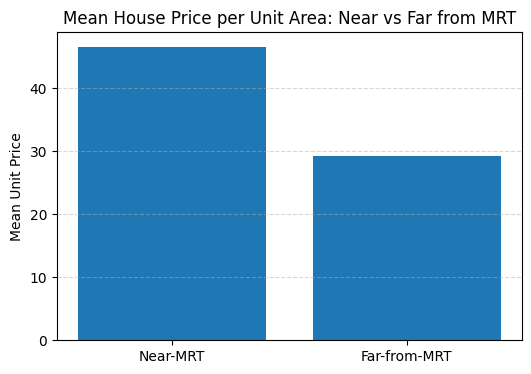

In [29]:

# Visualization of means
plt.figure(figsize=(6,4))
plt.bar(["Near-MRT", "Far-from-MRT"], [near_mrt.mean(), far_mrt.mean()])
plt.title("Mean House Price per Unit Area: Near vs Far from MRT")
plt.ylabel("Mean Unit Price")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [30]:
y = df["Y house price of unit area"].dropna()

mean_y = y.mean()
std_y = y.std(ddof=1)     
n = len(y)

MOE = t_stat * (std_y / np.sqrt(n))

lower = mean_y - MOE
upper = mean_y + MOE

print(f"Mean Y: {mean_y:.2f}")
print(f"Sample Size (n): {n}")
print(f"Margin of Error (95% CI): ±{MOE:.2f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

Mean Y: 38.23
Sample Size (n): 307
Margin of Error (95% CI): ±11.12
95% Confidence Interval: (27.12, 49.35)
